Correlation between miss distance and magnitude: -0.3064389721210181, p-value: 0.0004584355653810183


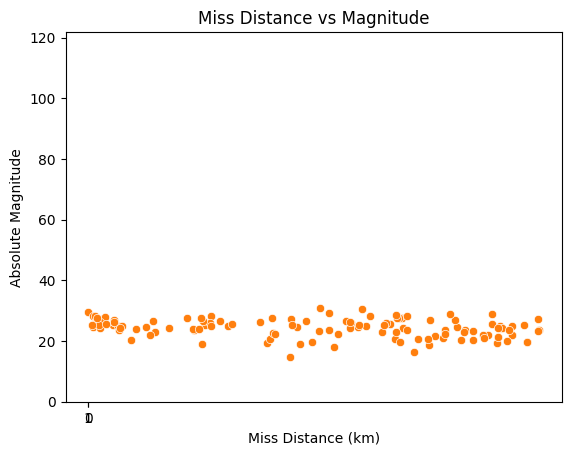

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def correlation_analysis_and_visualization(db_file='nasa_data.db'):
    conn = sqlite3.connect(db_file)

    # Load data
    neows_data = pd.read_sql('SELECT * FROM neows_data', conn)
    meteorite_data = pd.read_sql('SELECT * FROM meteorite_landings', conn)

    # Example correlation analysis between miss distance and magnitude
    correlation, p_value = pearsonr(neows_data['miss_distance_km'], neows_data['absolute_magnitude_h'])
    print(f'Correlation between miss distance and magnitude: {correlation}, p-value: {p_value}')

    # Visualize the distribution of potentially hazardous asteroids
    sns.countplot(data=neows_data, x='is_potentially_hazardous')
    plt.title('Potentially Hazardous Asteroids')
    plt.xlabel('Is Potentially Hazardous')
    plt.ylabel('Count')
    plt.savefig('potentially_hazardous_asteroids.png')

    # Visualize the relationship between miss distance and magnitude
    sns.scatterplot(data=neows_data, x='miss_distance_km', y='absolute_magnitude_h')
    plt.title('Miss Distance vs Magnitude')
    plt.xlabel('Miss Distance (km)')
    plt.ylabel('Absolute Magnitude')
    plt.savefig('miss_distance_vs_magnitude.png')

    conn.close()

# Usage example
if __name__ == "__main__":
    correlation_analysis_and_visualization()
